Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 28s 158ms/step - accuracy: 0.6155 - loss: 0.7824 - val_accuracy: 0.8108 - val_loss: 0.4488
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.7690 - loss: 0.5090 - val_accuracy: 0.8242 - val_loss: 0.4033
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.8280 - loss: 0.4117 - val_accuracy: 0.8499 - val_loss: 0.3822
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8473 - loss: 0.3819 - val_accuracy: 0.8410 - val_loss: 0.3919
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.8492 - loss: 0.3807 - val_accuracy: 0.8339 - val_loss: 0.4709
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8251 - loss: 0.4298 - val_accuracy: 0.8552 - val_loss: 0.3640
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8514 - loss: 0.3719 - val_accuracy: 0.8508 - val_loss: 0.3303
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.8654 - loss: 0.3473 - val_accuracy: 0.8

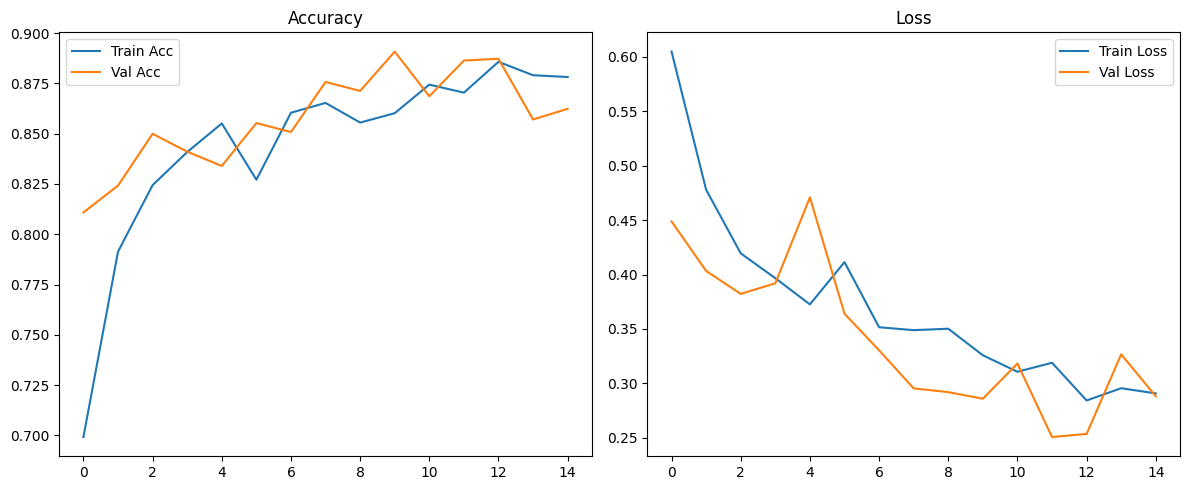

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
Classification Report:

              precision    recall  f1-score   support

      cloudy       0.98      0.87      0.92       300
      desert       0.86      1.00      0.92       226
  green_area       0.73      0.99      0.84       300
       water       0.98      0.63      0.76       300

    accuracy                           0.86      1126
   macro avg       0.89      0.87      0.86      1126
weighted avg       0.89      0.86      0.86      1126



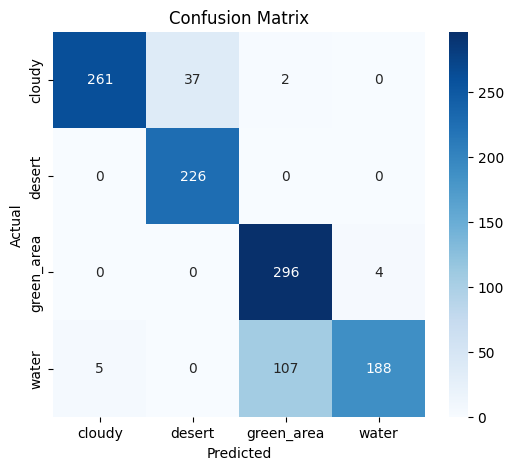

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

base_dir = "/kaggle/input/satellite-image-classification2/data"


img_height, img_width = 128, 128
batch_size = 32
epochs = 15

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys(), cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
